In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#%inline matplotlib
import seaborn as sns

In [57]:
x_train=pd.read_csv(r'C:\Users\dell\Downloads\Logistic_X_Train.csv')
y_train=pd.read_csv(r'C:\Users\dell\Downloads\Logistic_Y_Train.csv')
x=x_train.values.reshape(-1,3)
y=y_train.values.reshape(-1,1)
#data=x
#data
data=x_train
data['label']=y

Data=data.values.reshape(-1,4)
Data.shape

(3000, 4)

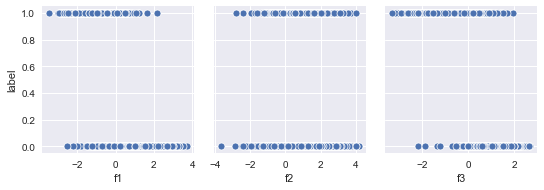

In [38]:
sns.pairplot(data,x_vars=['f1','f2','f3'],y_vars='label')

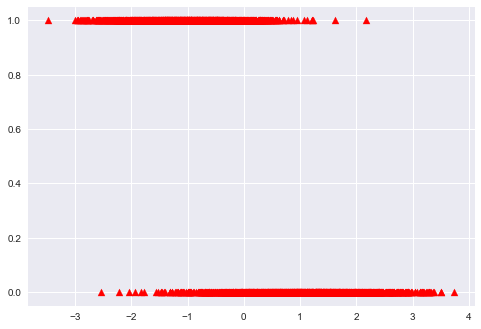

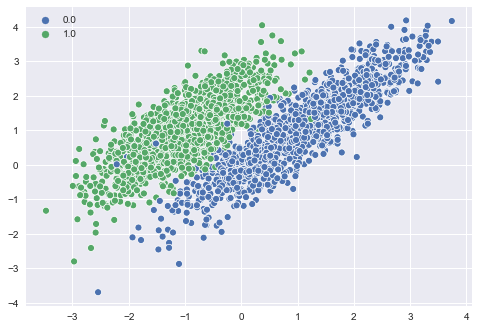

In [39]:
plt.scatter(Data[:,0],Data[:,3],color='r',marker='^')   #plt.scatter(x[:,0],y,color='r',marker='^')
plt.show()
#plt.style.use('')
sns.scatterplot(Data[:,0],Data[:,1],hue=Data[:,3])

In [53]:
split=int(.8*Data.shape[0]) #splitting the training data into 85% for training and 15% for testing purpose

In [68]:
x_train2=Data[:split,:-1]
y_train2=Data[:split,-1]  
x_test=Data[split:,:-1]    #-1 th column not included 
y_test=Data[split:,-1]        
print(x_train2.shape,x_test.shape)
print(y_train2.shape,y_test.shape)

(2400, 3) (600, 3)
(2400,) (600,)


In [40]:
def hypothesis(x,w,b):
    hx=np.dot(x,w)+b
    return sigmoid(hx)

In [41]:
def sigmoid(h):
    return 1.0/(1.0 + np.exp(-1.0*h))

In [42]:
def error(x,w,b,y):       #loss function
    err=0.0
    m=x.shape[0]
    for i in range(m):
        hx=hypothesis(x[i],w,b)
        err+=y[i]*np.log2(hx)+(1-y[i])*np.log2(1-hx)  #cross entropy similar to cost function
    return err/m      #mean of the error

In [43]:
def get_grad(x,w,b,y):
    grad_b=0.0           #gradient of bias
    grad_w=np.zeros(w.shape)     #gradient of weights
    m=x.shape[0]   #no of data in the training set
    for i in range(m):
        hx=hypothesis(x[i],w,b)
        grad_b+=(y[i]-hx)
        grad_w+=(y[i]-hx)*x[i]
    grad_b/=m
    grad_w/=m
    return [grad_w,grad_b]
        

In [98]:
def gradientDescent(x,w,b,y,learning_rate=0.01):
    e=error(x,w,b,y)
    [grad_w,grad_b]=get_grad(x,w,b,y)
    w+=learning_rate*grad_w
    b+=learning_rate*grad_b
    return e,w,b

In [99]:
def prediction(x,w,b):
    confidence=hypothesis(x,w,b)
    if confidence<0.5:
        return 0
    else: 
        return 1

In [116]:
def getAccuracy(xtest,ytest,w,b):      #predicting y_test values and finding the accuracy
    yp=[]
    for i in range(xtest.shape[0]):
        ypredict=prediction(xtest[i],w,b)
        yp.append(ypredict)            #list of predicted values of ytest
    yp=np.array(yp)
    
    return float((yp==ytest).sum())/ytest.shape[0]      #will sum the number of true's/datasize(ytest)
    

In [117]:
accuracy=[]
logloss=[]
np.random.seed(1)
w=2*np.random.random((x_train2.shape[1],))
b=5*np.random.random()

In [118]:
for i in range(1000):
    err,w,b=gradientDescent(x_train2,w,b,y_train2,learning_rate=0.1)
    accuracy.append(getAccuracy(x_test,y_test,w,b))
    logloss.append(err)

Text(0.5, 0, 'Time')

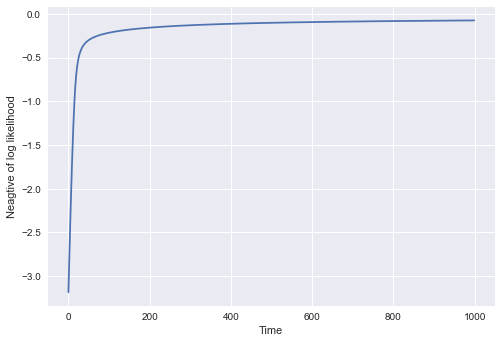

In [119]:
plt.plot(logloss)
plt.ylabel('Neagtive of log likelihood')
plt.xlabel('Time')

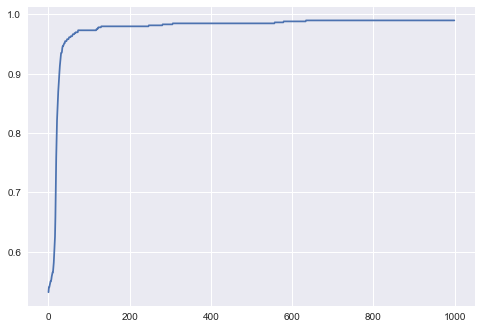

0.99


In [120]:
plt.plot(accuracy)
plt.show()
print(accuracy[-1])

In [142]:
X_testd=pd.read_csv(r'C:\Users\dell\Downloads\Logistic_X_Test.csv')
X_test=X_testd.values.reshape(-1,3)
Y_test=[]
for i in range(X_test.shape[0]):
    Y_test.append(prediction(X_test[i],w,b))
Y_test=np.array(Y_test)

predicted_y_values=pd.DataFrame(Y_test,columns=['label'])
predicted_y_values
X_testd['label']=Y_test
X_testd


,f1,f2,f3,label
0,-0.767508,-0.261859,-2.514831,1
1,-1.241653,1.449001,-0.413089,1
2,1.925270,1.931761,1.342619,0
3,-1.298255,1.049761,-0.527319,1
4,-0.964712,0.938088,-1.186328,1
...,...,...,...,...
995,2.877461,3.043965,2.308939,0
996,3.128835,3.115084,1.856309,0
997,-1.186969,0.947347,-0.786386,1
998,-0.532324,1.845170,-0.993550,1


In [147]:
print(w)
print(b)

[-2.23309055  1.5034913  -2.48673523]
-1.7156842048931222
